# 1. Load & visualize the data

In [ ]:
import numpy as np
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
import csv
import pdb
# if you need, you can use other libraries


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cuirie_0612_3.txt to cuirie_0612_3.txt


In [ ]:
a = '1 2 3'
b = list(a.split())
print(b)
for j in b:
  print(float(j))

['1', '2', '3']
1.0
2.0
3.0


In [ ]:
f = open('cuirie_0612_3.txt', 'r', encoding='utf-8')
reader=csv.reader(f)
x = []
y = []

for i, row in enumerate(reader) :
  #pdb.set_trace()
  tmp = list(row[0].split())
  #print(tmp)
  x.append(float(tmp[0]))
  y.append(tmp[1:])
#x = x[:9]
#y = y[:9]
y = [[abs(float(k)) for k in Temp] for Temp in y]

[51.0, 51.1, 51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52.0, 52.1, 52.2, 52.3, 52.4]
15


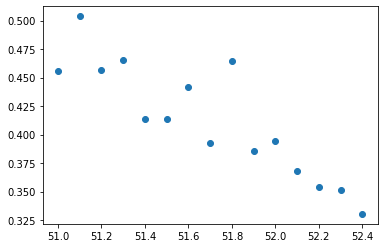

In [ ]:
aver_y = [np.mean([y[i]]) for i in range(len(x))]
print(x)
print(len(aver_y))
plt.scatter(x, aver_y)

In [ ]:
print(len(y[0]))

50


# 2. Implement Chi_square_minimization algorithm

In [ ]:
# Define Cost function J
def cost(x, average, theta, inv):
    # Compute cost for linear regression
    # J is the cost using theta as the parameter for linear regression to fit the data points in X and y

    dif = np.zeros((1,len(x)))
    dif_t = np.zeros((len(x),1))
    
    for i in range(len(x)):
      tmp=sqrt(3*(1 - x[i]/theta))
      dif[0][i] = average[i] - tmp
      dif_t[i][0] = dif[0][i]
    
    J = np.matmul(dif, np.matmul(inv, dif_t))
    return J[0][0]


In [ ]:
len(x)

15

In [ ]:
    dif = np.ones((1,7))
    dif_t = np.ones((7,1))
    dif[0][2] = 3
    dif_t[2] = 5
    b = np.matmul(dif, dif_t)
    print(b[0][0])

21.0
[[21.]]


In [ ]:
# Implement Gradient descent algorithm
def gradient_descent(x, average, theta, alpha, num_iters, inv):
    # gradient_descent Performs gradient descent to learn theta
    # gradient_descent updates theta by taking num_iters gradient steps with learning rate alpha
    
    for iter in range(num_iters):
        s=[0,0]
        rounda = np.zeros((1, len(x)))
        roundb = np.zeros((1, len(x)))
        dif_t = np.zeros((len(x),1))

        for i in range(len(x)):
          dif_t[i][0] = sqrt(3*(1-x[i]/theta)) - average[i]
          roundb[0][i] = sqrt(3)*x[i]/2/sqrt(1-x[i]/theta)/(theta**2)
        ###################################################################################
        s = 2*np.matmul(roundb, np.matmul(inv, dif_t))[0][0]

        theta-=alpha*s
        if theta<max(x):
          print("err")
          theta = max(x)
        ###################################################################################
          
            
        ################################################w###################################
        #                                  END OF YOUR CODE                               #
        ###################################################################################

        # Save the cost J in every iteration    
        J = cost(x, average, theta, inv)
        #print("i, theta", iter, theta, J)
        
        if (iter+1)%25000 is 0:
            print('cost at %d iterations : %f, theta : %f' %(iter+1, J, theta))
            
    return theta

In [ ]:
N = len(x)
###################################################################################
average = np.zeros((50,N))
covariance = np.zeros((50, N, N))
theta = np.zeros(50)
ki_square = np.zeros(50)
dif = np.zeros((1,N))
dif_t = np.zeros((N,1))

for out in range(50):
  print('out : ', out)
  for i in range(N):
    s = 0
    for j in range(50):
      if j==out:
        continue
      s += y[i][j]
    average[out][i] = s/49
  #plt.scatter(x, average[out])
  #pdb.set_trace()
  for i in range(N):
    for j in range(N):
      sum = 0
      for k in range(50):
        if k==out:
          continue
        sum += (y[i][k] - average[out][i])*(y[j][k] - average[out][j])
      covariance[out][i][j] = sum/(49*48)
  #print("cov", covariance[out])

  cov_inv = np.linalg.inv(covariance[out])
  num_iters = 100000
  alpha = 0.00001
  theta[out] = 53.6
  # compute initial cost
  init_J = cost(x, average[out], theta[out], cov_inv)
  print('initial cost : %f' %init_J)

  # excute gradient descent
  theta[out] = gradient_descent(x, average[out], theta[out], alpha, num_iters, cov_inv)

  # compute new cost
  new_J = cost(x, average[out], theta[out], cov_inv)
  for i in range(N):
    dif[0][i] = average[out][i] - sqrt(3*(1 - x[i]/theta[out]))
    dif_t[i][0] = dif[0][i]
  ki_square[out] = np.matmul(dif, np.matmul(cov_inv, dif_t))[0][0]

  print('updated theta : ', theta[out])
  print('updated cost : %f' %new_J)

#def cost(x, average, theta, inv):
#def gradient_descent(x, average, theta, alpha, num_iters, inv)

#data_x, data_y = x,y
###################################################################################
#                                  END OF YOUR CODE                               #
###################################################################################


out :  0
initial cost : 488.071794
cost at 25000 iterations : 51.133102, theta : 54.901219
cost at 50000 iterations : 51.133102, theta : 54.901219
cost at 75000 iterations : 51.133102, theta : 54.901219
cost at 100000 iterations : 51.133102, theta : 54.901219
updated theta :  54.901218839403256
updated cost : 51.133102
out :  1
initial cost : 496.960165
cost at 25000 iterations : 49.812908, theta : 54.913307
cost at 50000 iterations : 49.812908, theta : 54.913307
cost at 75000 iterations : 49.812908, theta : 54.913307
cost at 100000 iterations : 49.812908, theta : 54.913307
updated theta :  54.913307266897576
updated cost : 49.812908
out :  2
initial cost : 538.298514
cost at 25000 iterations : 48.997856, theta : 54.902786
cost at 50000 iterations : 48.997856, theta : 54.902786
cost at 75000 iterations : 48.997856, theta : 54.902786
cost at 100000 iterations : 48.997856, theta : 54.902786
updated theta :  54.902785708108475
updated cost : 48.997856
out :  3
initial cost : 488.887355
co

In [ ]:
theta

array([54.90121884, 54.91330727, 54.90278571, 54.90659844, 54.92407328,
       54.95135999, 54.89099317, 54.90854669, 54.89863321, 54.99536942,
       54.89449288, 54.89188757, 54.86530255, 54.91283921, 54.89742406,
       54.90540006, 54.91091123, 54.87597132, 54.8890118 , 54.88845951,
       54.90785081, 54.90531398, 54.90945691, 54.88189715, 54.90612943,
       54.93116128, 54.8824106 , 54.88448893, 54.91747835, 54.9290884 ,
       54.92099833, 54.91127659, 54.87985741, 54.91411459, 54.87446578,
       54.92578589, 54.924311  , 54.90749346, 54.93544405, 54.90701133,
       54.90817465, 54.92983361, 54.91297336, 54.9084469 , 54.9077491 ,
       54.91587998, 54.88529109, 54.90691222, 54.90373854, 54.90367947])

In [ ]:
ki_square

array([51.1331019 , 49.81290847, 48.99785611, 50.06032625, 51.4896692 ,
       51.66148265, 49.47001947, 51.53467678, 50.65716451, 56.81398811,
       52.94613181, 49.95773054, 59.94167172, 51.24954073, 49.31899929,
       49.22642135, 52.56533307, 52.88853119, 56.83953923, 51.93785247,
       49.14576626, 50.06973997, 52.54960682, 52.92707823, 49.07793575,
       51.12331514, 50.12100935, 56.39776859, 51.48837661, 53.01402636,
       56.7811316 , 49.18767954, 51.09325661, 55.7527408 , 55.32618772,
       50.0409424 , 51.57893993, 49.04071616, 50.341399  , 49.91473275,
       49.16986363, 51.0776241 , 49.98573898, 49.27136825, 51.18636304,
       53.02768055, 60.40948485, 48.97840968, 52.05231749, 49.01949248])

In [ ]:
dof

14

In [ ]:
theta_aver = np.zeros(1)
theta_err = np.zeros(1)
theta_sum = np.zeros(1)

for i in range(1):
  tmp = 0
  for j in range(50):
    tmp += theta[j]
  theta_aver[i] = tmp/50

for i in range(1):
  tmp = 0
  for j in range(50):
    tmp += (theta_aver[i] - theta[j])**2
  theta_err[i] = sqrt(49/50*tmp)

print("Tc_average : ", theta_aver[0])
print("Tc_err : ", theta_err[0])

tmp = 0
for i in range(50):
  tmp += ki_square[i]
ki_aver = tmp/50
dof = N-1 #degree of freedom. 9-2=7

tmp = 0
for i in range(50):
  tmp += (ki_aver/dof - ki_square[i]/dof)**2
ki_err = sqrt(49/50*tmp)

print("chi_square/dof : ", ki_aver/dof)
print("chi/dof_err : ", ki_err)



Tc_average :  54.90726598692588
Tc_err :  0.14673343501938452
chi_square/dof :  3.696648053531225
chi/dof_err :  1.3951226017710587


# 3. Plot the linear regression fit

[51.0, 51.1, 51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52.0, 52.1, 52.2, 52.3, 52.4]
[0.45583999999999997, 0.50384, 0.4562800000000001, 0.4652400000000001, 0.4134399999999999, 0.41408000000000006, 0.4414, 0.39232, 0.4649999999999999, 0.38543999999999995, 0.39452000000000004, 0.3683600000000001, 0.35436, 0.35168, 0.33043999999999996]
40


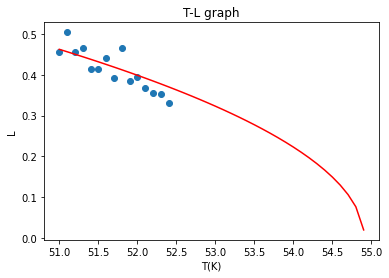

In [ ]:
# Plot the scatter plot and linear regression fit

###################################################################################
aver_y = [np.mean([y[i]]) for i in range(len(x))]
print(x)
print(aver_y)

plt.xlabel('T(K)')
plt.ylabel('L')
plt.title('T-L graph')
plt.scatter(x, aver_y)
new_x=np.arange(min(x),55,0.1)
print(len(new_x))
nx=len(new_x)
import pdb
#pdb.set_trace()
#new_y=new_x*(theta[1]*np.ones(len(new_x)))+(theta[0]*np.ones(len(new_x)))
new_y = np.sqrt(3*(np.ones(nx) - new_x/theta_aver[0]))
plt.plot(new_x,new_y,'r')

